In [1]:
import mphot

In [9]:
instrument_efficiency_path = "../resources/systems/speculoos_Andor_iKon-L-936_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = (
    "../resources/filters/I+z.csv"  # index in microns, filter efficiency as fraction
)

name1, system_response1 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

instrument_efficiency_path = "../resources/systems/speculoos_PIRT_1280SciCam_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = "../resources/filters/H_Panic.csv"  # index in microns, filter efficiency as fraction

name2, system_response2 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

`/opt/homebrew/Caskroom/miniconda/base/envs/mphot_pip/lib/python3.11/site-packages/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!
`/opt/homebrew/Caskroom/miniconda/base/envs/mphot_pip/lib/python3.11/site-packages/mphot/datafiles/system_responses/speculoos_PIRT_1280SciCam_-60_H_Panic_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

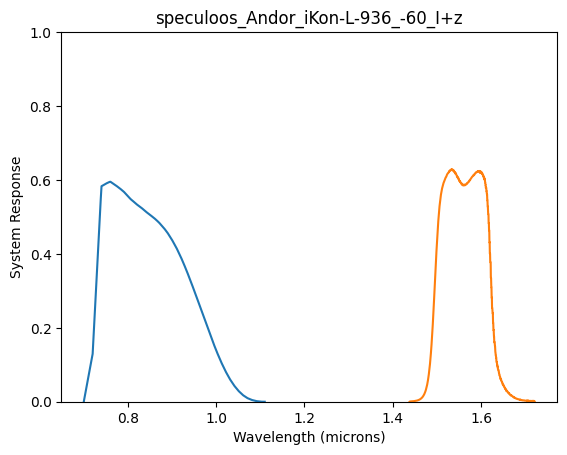

In [10]:
system_response1.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)
system_response2.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)

In [11]:
# sky properties
props_sky = {
    "pwv": 2.5,  # PWV [mm]
    "airmass": 1.1,  # airmass
    "seeing": 2.5,  # seeing (==FWHM) ["]
}

# instrument properties
props_instrument1 = {
    "name": name1,  # name to get SR/precision grid from file
    "plate_scale": 0.35,  # pixel plate scale ["]
    "N_dc": 0.2,  # dark current [e/pix/s]
    "N_rn": 6.328,  # read noise [e_rms/pix]
    "well_depth": 64000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 10.5,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# instrument properties
props_instrument2 = {
    "name": name2,  # name to get SR/precision grid from file
    "plate_scale": 0.31,  # pixel plate scale ["]
    "N_dc": 110,  # dark current [e/pix/s]
    "N_rn": 90,  # read noise [e_rms/pix]
    "well_depth": 56000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 0.1,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 5180  # [K]
distance = 2270  # [pc]

In [12]:
es = range(5, 300, 5)
precisions = []

for e in es:
    a, b, c = mphot.get_precision(
        props_instrument1, props_sky, Teff, distance, exp_time=e
    )
    precisions.append(b["All"] * 1000)

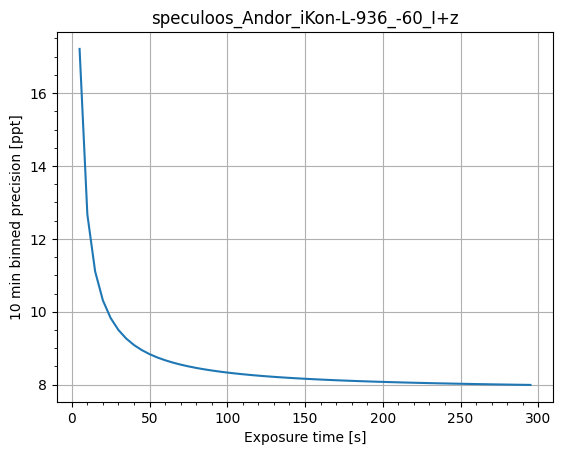

In [13]:
import matplotlib.pyplot as plt

plt.plot(es, precisions)
plt.title(f"{name1}")
plt.grid()
plt.xlabel("Exposure time [s]")
plt.ylabel("10 min binned precision [ppt]")

plt.minorticks_on()

In [14]:
# get the precision and components used to calculate it (generates grid if not already present)
result1 = mphot.get_precision(props_instrument1, props_sky, Teff, distance)
result2 = mphot.get_precision(
    props_instrument2, props_sky, Teff, distance, exp_time=120
)

mphot.display_results(result1, result2)

single frame [ppt]  \
              speculoos_Andor_iKon-L-936_-60_I+z   
All                                         4.66   
Star                                       0.889   
Scintillation                              0.102   
Sky                                         4.53   
Dark current                               0.553   
Read noise                                 0.190   

                                                     \
              speculoos_PIRT_1280SciCam_-60_H_Panic   
All                                             229   
Star                                           5.30   
Scintillation                                 0.383   
Sky                                             147   
Dark current                                    138   
Read noise                                      108   

                          10 minute binned [ppt]  \
              speculoos_Andor_iKon-L-936_-60_I+z   
All                                         7.85   
Star                                        1.50   
Scintillation                              0.172   
Sky                                         7.64   
Dark current                               0.931   
Read noise                                 0.320   

                                                     
              speculoos_PIRT_1280SciCam_-60_H_Panic  
All                                             102  
Star                                           2.37  
Scintillation                                 0.171  
Sky                                            65.6  
Dark current                                   62.0  
Read noise                                     48.5

,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_PIRT_1280SciCam_-60_H_Panic
Teff [K],5.18e+3,5.18e+3
distance [pc],2.27e+3,2.27e+3
N_star [e/s],747,296
star_flux [e/m2/s],1.03e+3,410
scn [e_rms],129,13.6
pixels in aperture [pix],1.44e+3,1.84e+3
ap_radius [pix],21.4,24.2
N_sky [e/pix/s],13.5,123
sky_radiance [e/m2/arcsec2/s],152,1.77e+3
seeing [arcsec],2.50,2.50


,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_PIRT_1280SciCam_-60_H_Panic
star [mag],16.7,15.8
sky [mag/arcsec2],18.8,14.2
vega_flux [e/s],3.64e+9,6.05e+8
